In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
#Let's load the basic libraries first
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.font_manager import FontProperties
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,log_loss


In [3]:
df_train = pd.read_csv("train.csv").drop(columns=['id'],axis=1)
df_test = pd.read_csv("test.csv").drop(columns=['id'],axis=1)
df_sub = pd.read_csv("sample_submission.csv")

In [4]:
df_train.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [5]:
print(f'Shape of Trainig Dataset in Playground Series s3e26 is :{df_train.shape}'
     f'\nShape of Test Dataset in Playground Series s3e26 is :{df_test.shape}'
     f'\nShape of Submission Dataset in Playground Series s3e26 is :{df_sub.shape}'
     )

Shape of Trainig Dataset in Playground Series s3e26 is :(7905, 19)
Shape of Test Dataset in Playground Series s3e26 is :(5271, 18)
Shape of Submission Dataset in Playground Series s3e26 is :(5271, 4)


In [6]:
print('Info of columns in Trainig Dataset in Playground Series s3e26:')
df_train.info()

Info of columns in Trainig Dataset in Playground Series s3e26:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   object 
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   object 
 4   Ascites        7905 non-null   object 
 5   Hepatomegaly   7905 non-null   object 
 6   Spiders        7905 non-null   object 
 7   Edema          7905 non-null   object 
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7905 non-null   float64
 15  Platelets      7905 non-null   float64
 16  Prothrombin    7905 non-null   fl

In [7]:
print('Info of columns in Test Dataset in Playground Series s3e26:')
df_test.info()

Info of columns in Test Dataset in Playground Series s3e26:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         5271 non-null   int64  
 1   Drug           5271 non-null   object 
 2   Age            5271 non-null   int64  
 3   Sex            5271 non-null   object 
 4   Ascites        5271 non-null   object 
 5   Hepatomegaly   5271 non-null   object 
 6   Spiders        5271 non-null   object 
 7   Edema          5271 non-null   object 
 8   Bilirubin      5271 non-null   float64
 9   Cholesterol    5271 non-null   float64
 10  Albumin        5271 non-null   float64
 11  Copper         5271 non-null   float64
 12  Alk_Phos       5271 non-null   float64
 13  SGOT           5271 non-null   float64
 14  Tryglicerides  5271 non-null   float64
 15  Platelets      5271 non-null   float64
 16  Prothrombin    5271 non-null   float

In [8]:
print('Info of columns in Submission Dataset:')
df_sub.info()

Info of columns in Submission Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         5271 non-null   int64  
 1   Status_C   5271 non-null   float64
 2   Status_CL  5271 non-null   float64
 3   Status_D   5271 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 164.8 KB


In [9]:
df_train.isnull().any().sum()

0

In [10]:
df_test.isnull().any().sum()

0

In [11]:
df_train.duplicated().sum()

0

In [12]:
df_train.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


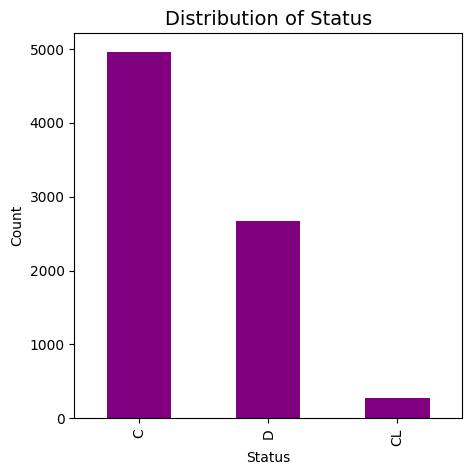

In [13]:
paper = plt.figure(figsize=(5,5))
df_train.Status.value_counts().plot.bar(color='purple')
plt.xlabel('Status',size=10)
plt.ylabel('Count',size=10)
plt.title('Distribution of Status',size=14)
plt.show()

In [14]:
df_train.Drug.value_counts()

Placebo            4010
D-penicillamine    3895
Name: Drug, dtype: int64

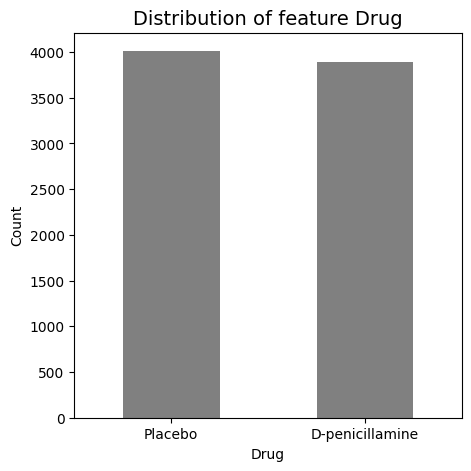

In [15]:
paper = plt.figure(figsize=(5,5))
df_train.Drug.value_counts().plot.bar(color='grey')
plt.xlabel('Drug',size=10)
plt.ylabel('Count',size=10)
plt.xticks(rotation=0)
plt.title('Distribution of feature Drug',size=14)
plt.show()

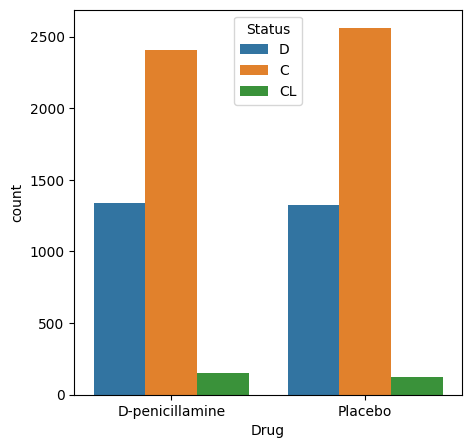

In [16]:
# Let's look at the countplot as well w.r.t Status
paper = plt.figure(figsize=(5,5))
sns.countplot(df_train,x='Drug',hue='Status')
plt.show()

In [17]:
#Distribution of Gender
df_train.Sex.value_counts()

F    7336
M     569
Name: Sex, dtype: int64

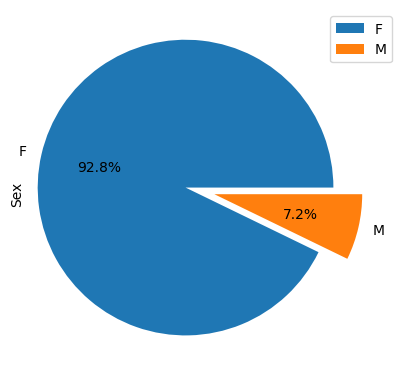

In [18]:
# Let's plot a pie Chart
df_train.Sex.value_counts().plot.pie(explode=[0.2,0],autopct='%3.1f%%',legend=True)
plt.show()

In [19]:
#Distribution of Ascites

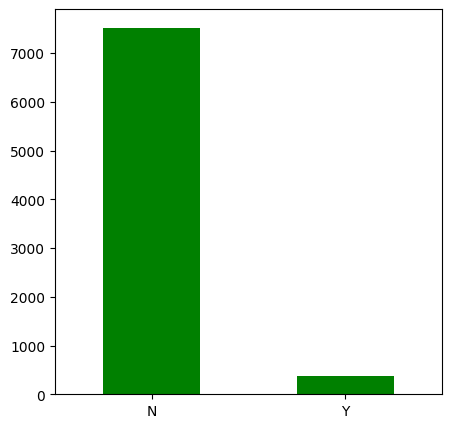

In [20]:
paper = plt.figure(figsize=(5,5))
df_train.Ascites.value_counts().plot.bar(color='green')
plt.xticks(rotation=0)
plt.show()

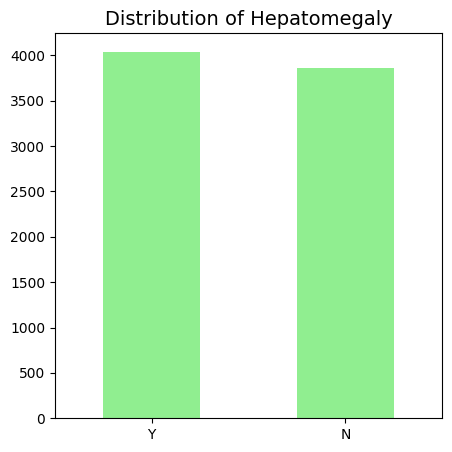

In [21]:
paper = plt.figure(figsize=(5,5))
df_train.Hepatomegaly.value_counts().plot.bar(color='lightgreen')
plt.xticks(rotation=0)
plt.title('Distribution of Hepatomegaly',size=14)
plt.show()

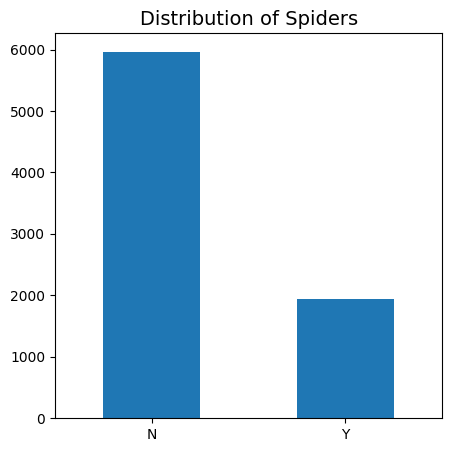

In [22]:
paper = plt.figure(figsize=(5,5))
df_train.Spiders.value_counts().plot.bar()
plt.xticks(rotation=0)
plt.title('Distribution of Spiders',size=14)
plt.show()

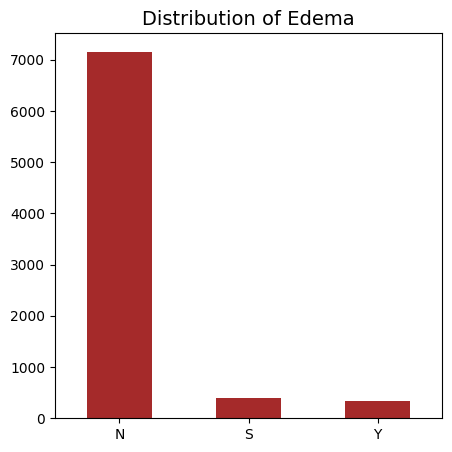

In [23]:
paper = plt.figure(figsize=(5,5))
df_train.Edema.value_counts().plot.bar(color='brown')
plt.title('Distribution of Edema',size=14)
plt.xticks(rotation=0)
plt.show()

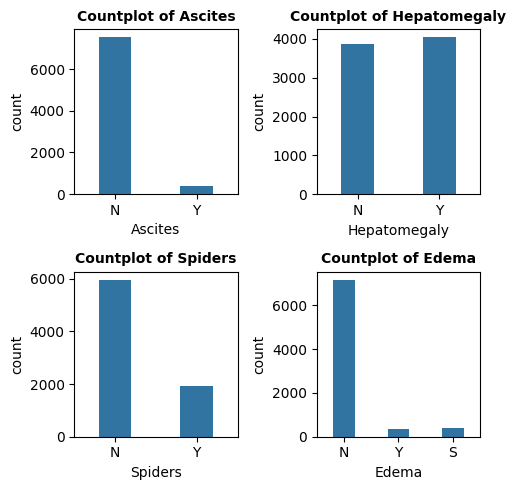

In [24]:
bool_col = ['Ascites','Hepatomegaly','Spiders','Edema']
figure,axes = plt.subplots(2,2,figsize=(20,10))

plt.subplots_adjust(hspace=0.5, wspace=0.5)

for i,col in enumerate(bool_col):
    sns.countplot(data=df_train, x=col, ax=axes[i//2, i%2],width=0.4)
    axes[i//2, i%2].set_title(f'Countplot of {col}',size=14,fontproperties=FontProperties(weight='bold'))
    axes[i//2, i%2].figure.set_size_inches(5, 5)
plt.tight_layout()
plt.show()

In [25]:
#Now let's look at the numerical columns

num_cols = [col for col in df_train.select_dtypes(include=['float64','int64']).columns if col !='id']
num_cols

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

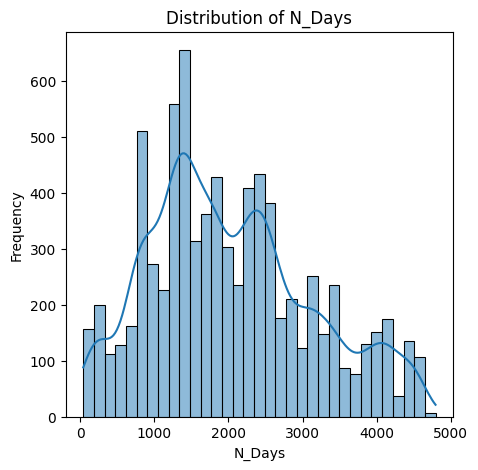

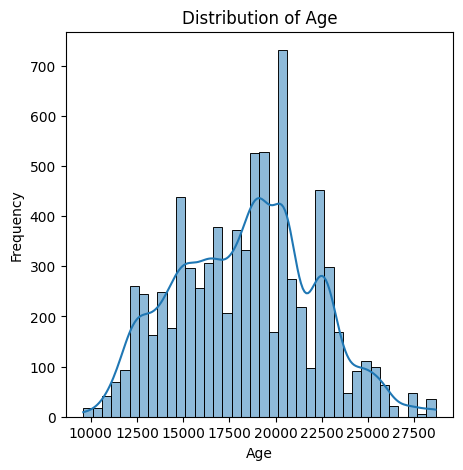

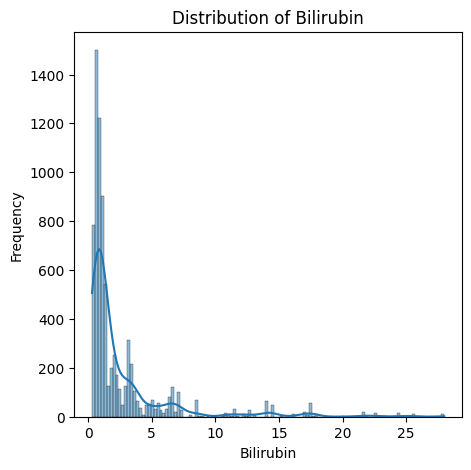

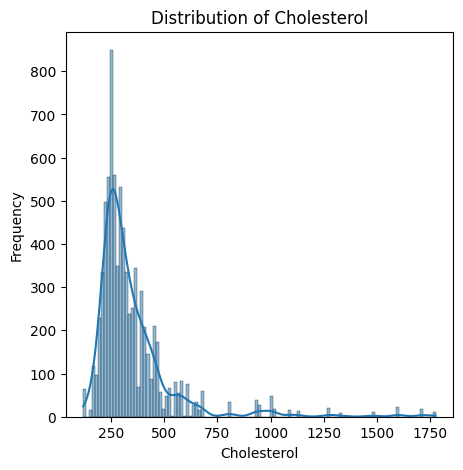

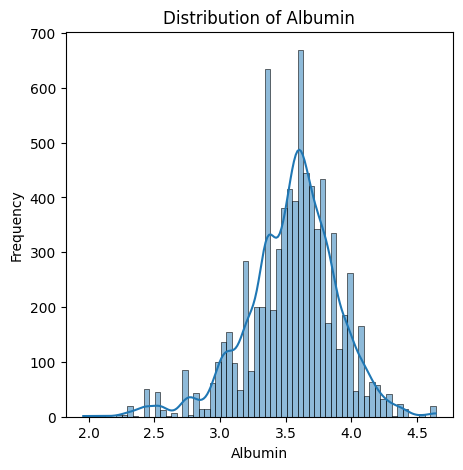

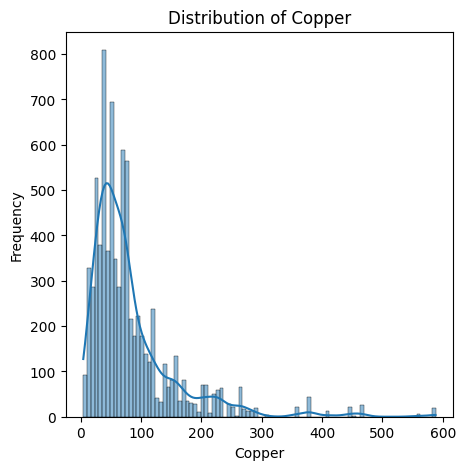

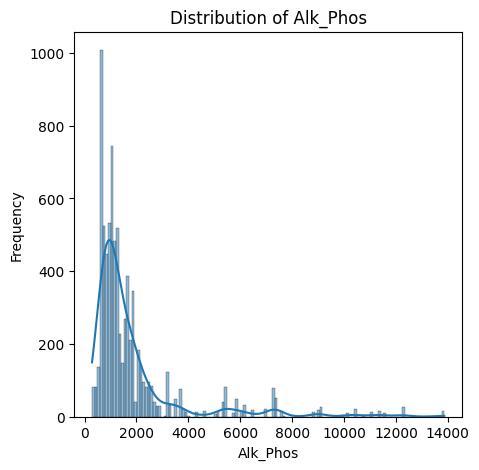

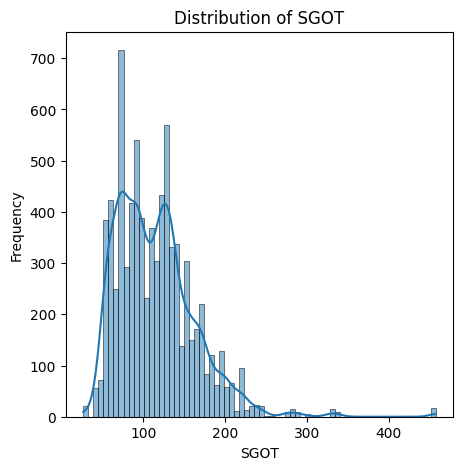

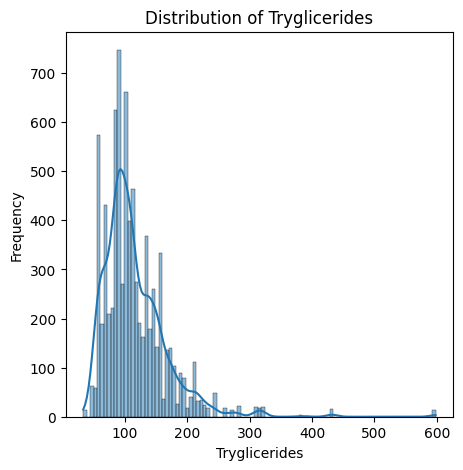

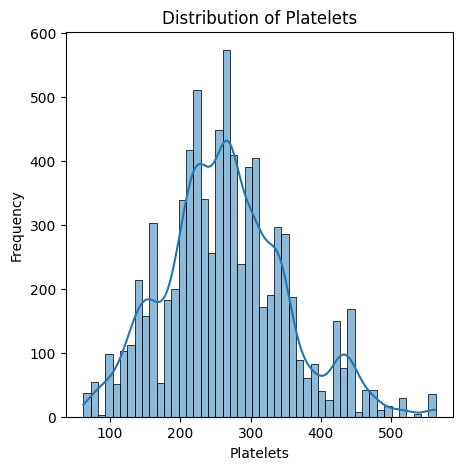

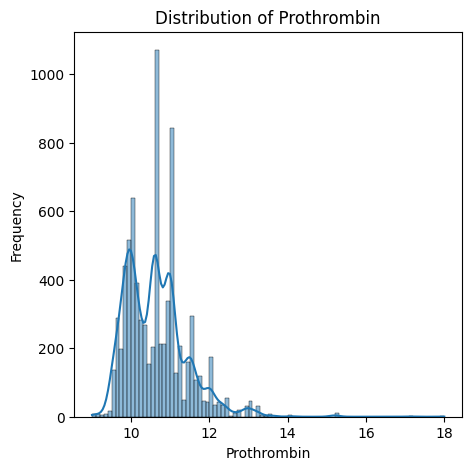

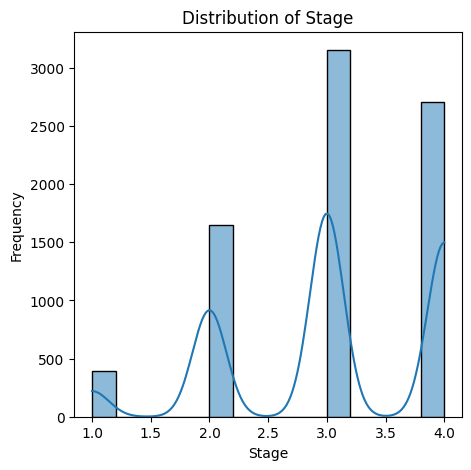

In [26]:
#Let's look at the distribution of these Numerical features

for i,col in enumerate(num_cols):
    plt.figure(figsize=(5,5))
    sns.histplot(data=df_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.show()
    

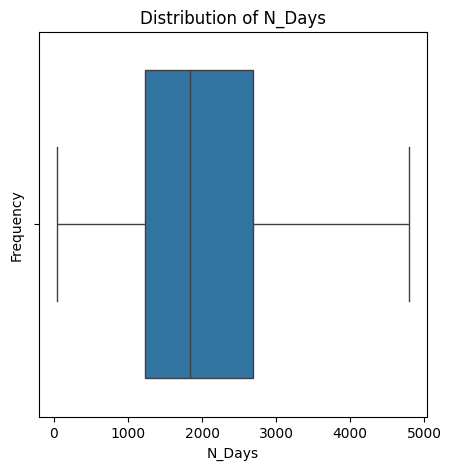

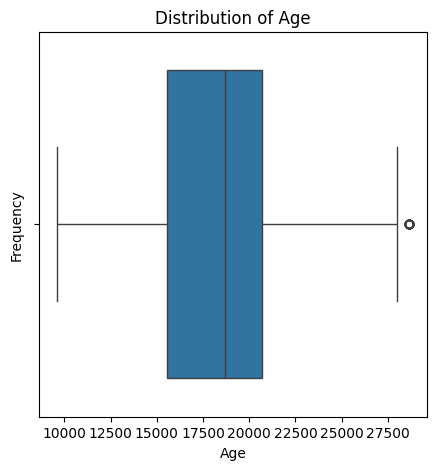

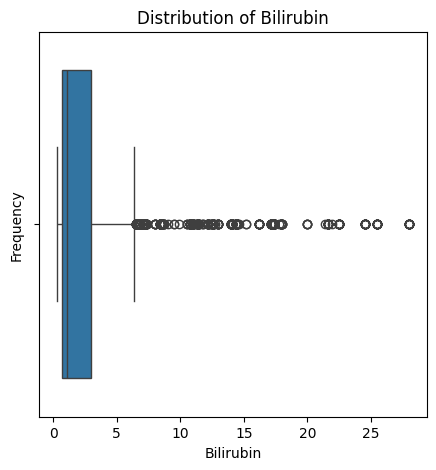

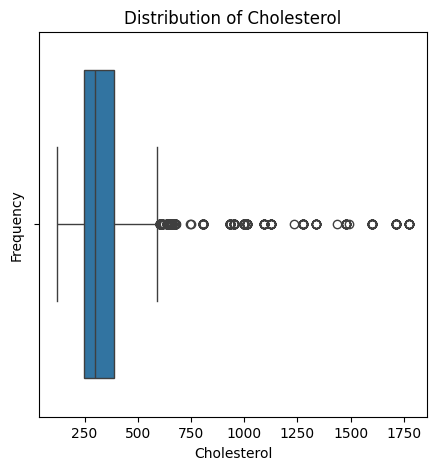

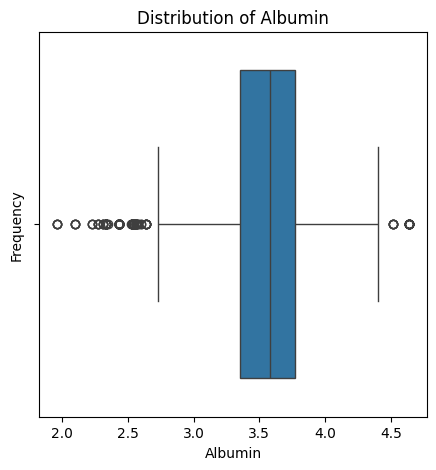

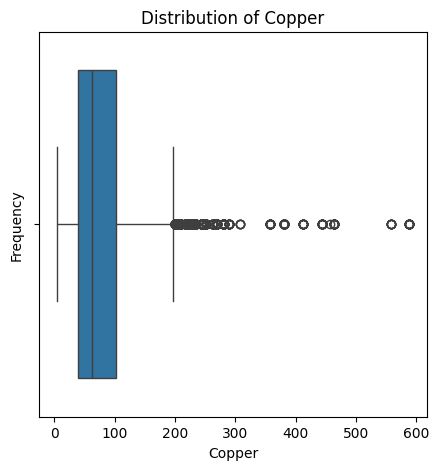

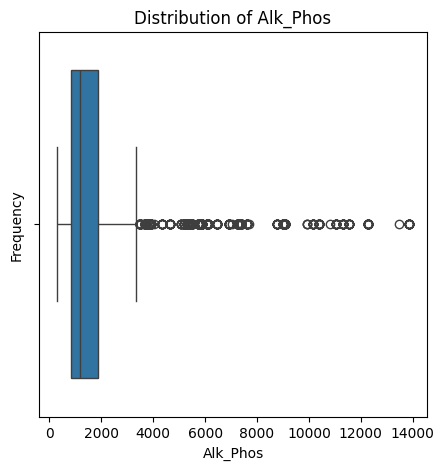

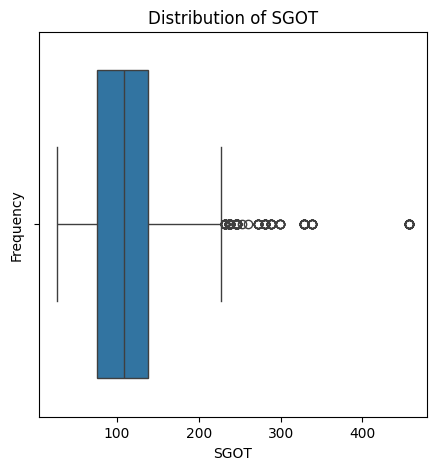

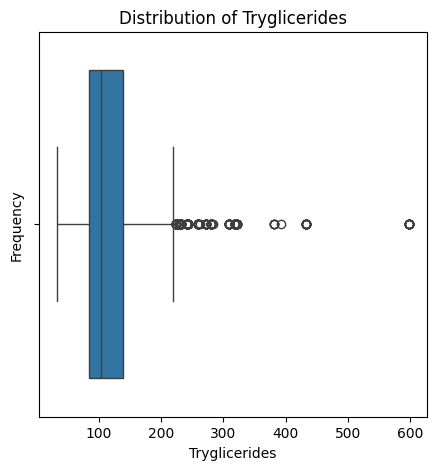

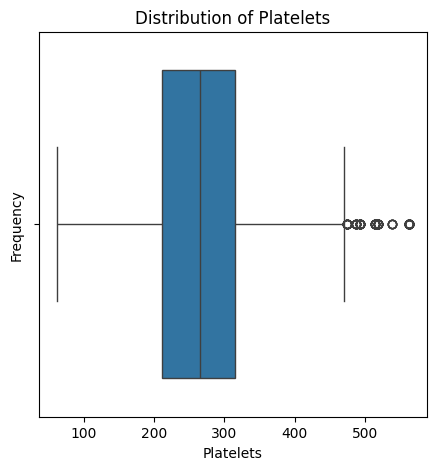

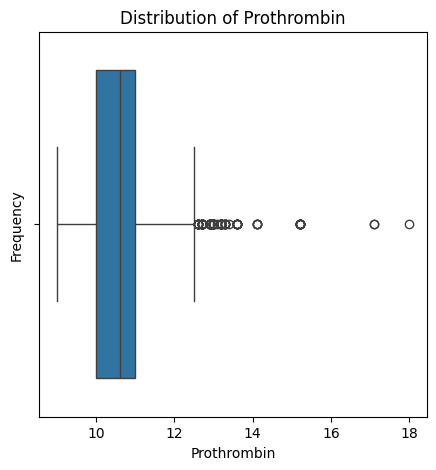

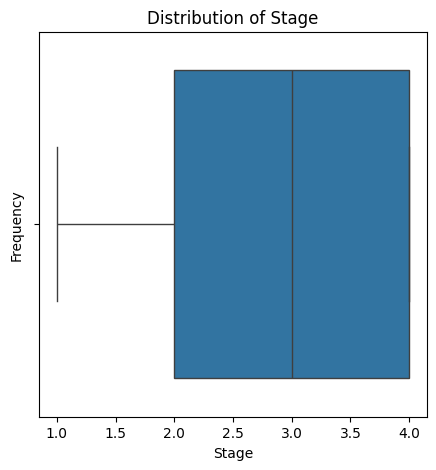

In [27]:
for i,col in enumerate(num_cols):
    plt.figure(figsize=(5,5))
    sns.boxplot(x=df_train[col])
    plt.title(f'Distribution of {col}')
    plt.xlabel(f'{col}')
    plt.ylabel('Frequency')
    plt.show()
    

<Axes: >

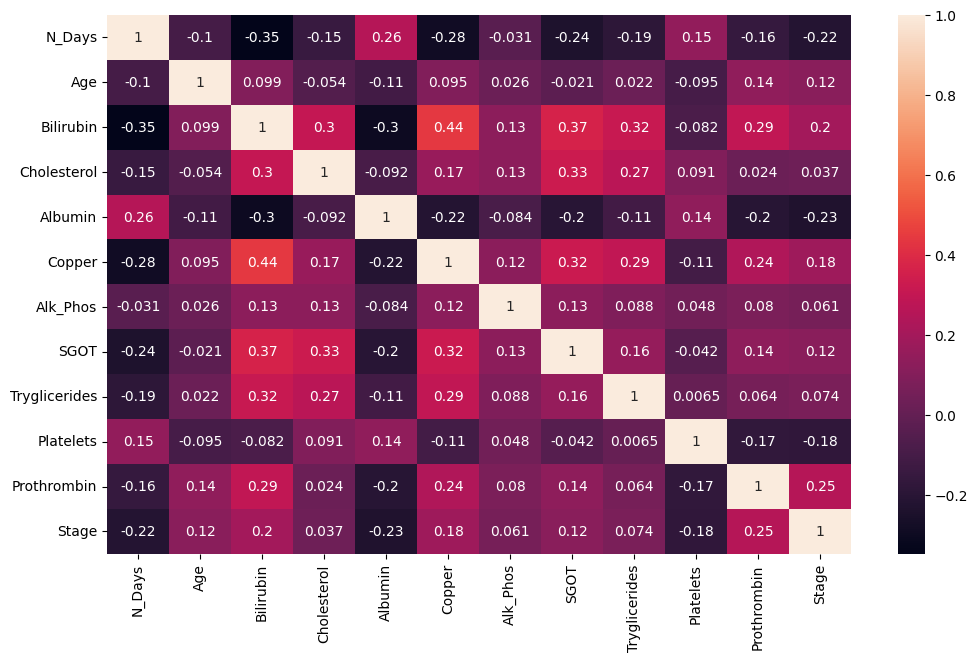

In [28]:
paper = plt.figure(figsize=(12,7))
sns.heatmap(df_train.select_dtypes(include=['float64','int64']).corr(),annot=True)

In [29]:
df_train.Age.describe()

count     7905.000000
mean     18373.146490
std       3679.958739
min       9598.000000
25%      15574.000000
50%      18713.000000
75%      20684.000000
max      28650.000000
Name: Age, dtype: float64

In [30]:
df_train.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [31]:
train = df_train.copy()
train.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [32]:
status_val = {"D": 0, "C": 1, "CL": 2}
train['Status'] = train['Status'].replace(status_val)
train.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,0
1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,1
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,0
3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,1
4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,1


In [33]:
cat_columns = train.select_dtypes(include='object').columns.tolist()
cat_columns

['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [34]:
cat_columns.append('Stage')
cat_columns

['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']

In [35]:
train = pd.get_dummies(
                        train, columns=cat_columns,
                        drop_first=True, dtype=int)
train.head()


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Status,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y,Stage_2.0,Stage_3.0,Stage_4.0
0,999,21532,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,0,0,1,0,0,0,0,0,0,1,0
1,2574,19237,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,1,1,0,0,0,0,0,0,0,1,0
2,3428,13727,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,0,1,0,0,1,1,0,1,0,0,1
3,2576,18460,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,1,1,0,0,0,0,0,0,0,1,0
4,788,16658,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,1,1,0,0,1,0,0,0,0,0,1


In [36]:
num_cols

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin',
 'Stage']

In [37]:
num_cols.remove('Stage')
num_cols

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

<Figure size 1500x700 with 0 Axes>

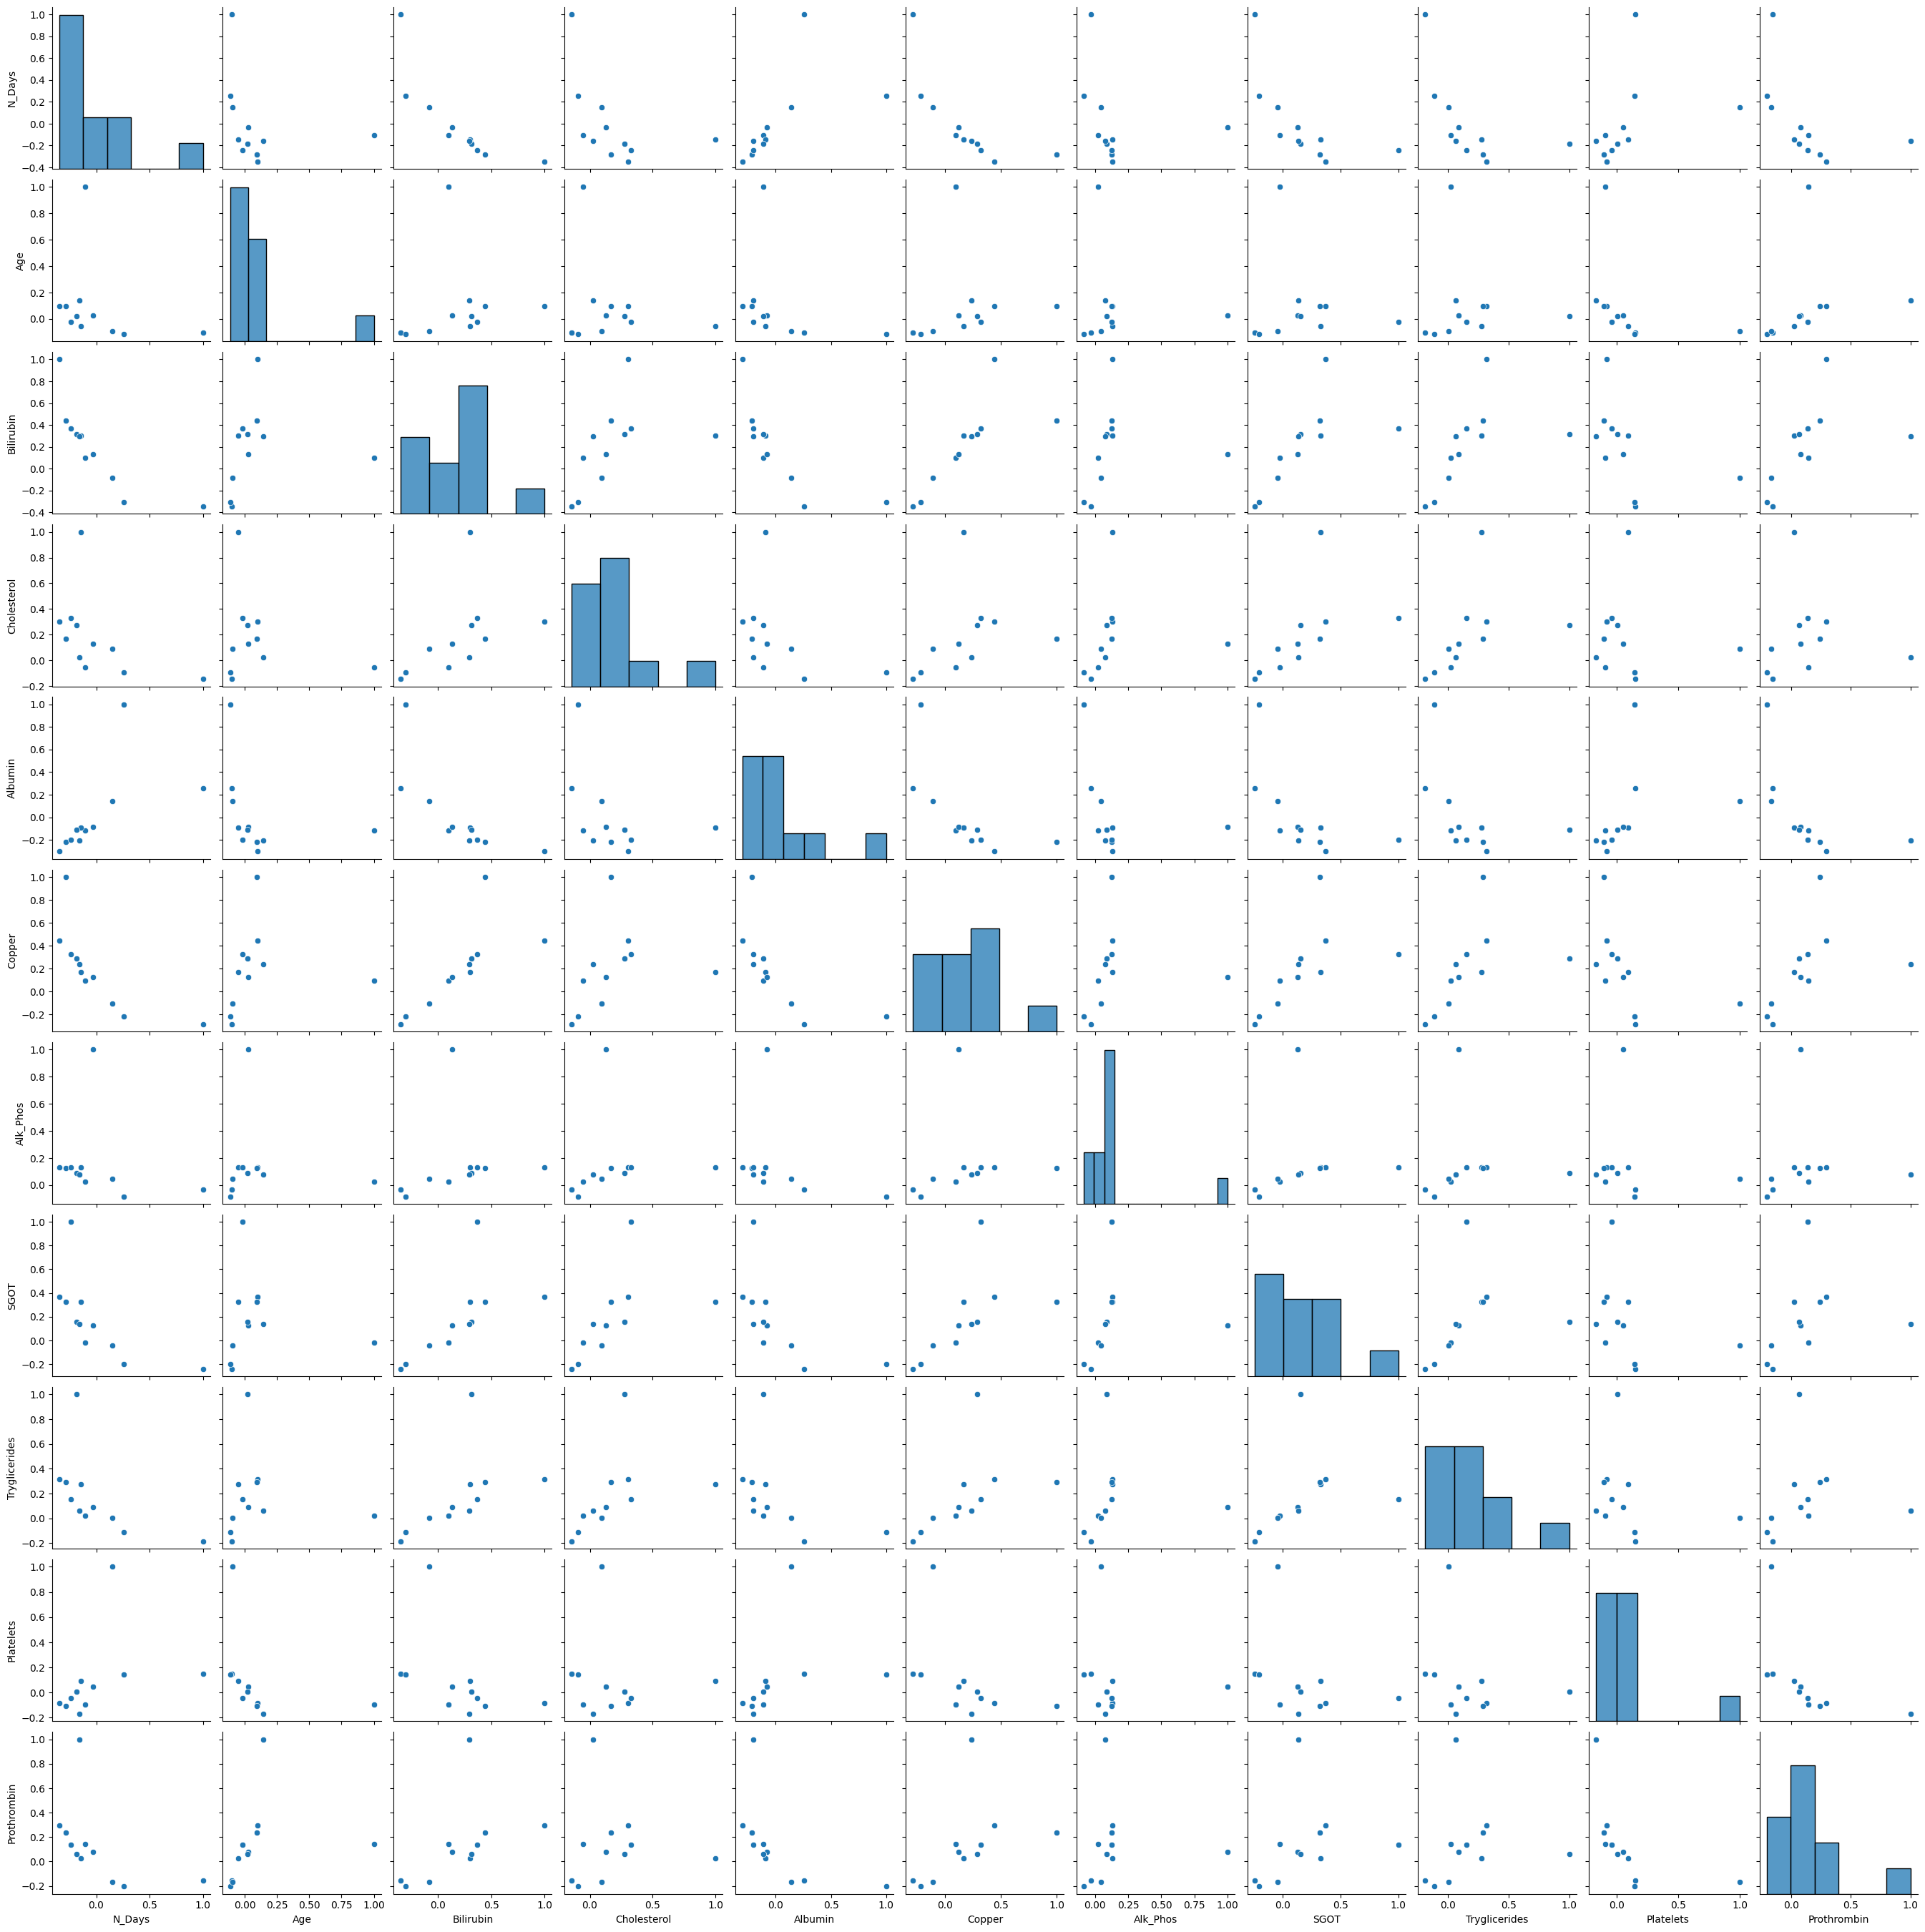

In [38]:
paper = plt.figure(figsize=(15,7))
sns.pairplot(train[num_cols].corr())
plt.show()

In [39]:
train.skew()

N_Days            0.448660
Age               0.084091
Bilirubin         3.339695
Cholesterol       3.679658
Albumin          -0.561150
Copper            2.701736
Alk_Phos          3.195558
SGOT              1.534806
Tryglicerides     2.633921
Platelets         0.420048
Prothrombin       1.292436
Status           -0.136518
Drug_Placebo     -0.029104
Sex_M             3.312782
Ascites_Y         4.226098
Hepatomegaly_Y   -0.045308
Spiders_Y         1.184223
Edema_S           4.107504
Edema_Y           4.468362
Stage_2.0         1.431810
Stage_3.0         0.413172
Stage_4.0         0.666562
dtype: float64

In [40]:
scaler = StandardScaler()
train[num_cols] = scaler.fit_transform(train[num_cols])
train.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Status,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y,Stage_2.0,Stage_3.0,Stage_4.0
0,-0.942430,0.858448,-0.077237,-0.176908,-0.572940,1.160785,-0.113334,1.336304,-0.996442,1.472341,-1.189049,0,0,1,0,0,0,0,0,0,1,0
1,0.497025,0.234760,-0.444429,0.068784,-0.024043,-0.275420,-0.197909,0.414968,-0.520497,1.095026,0.474024,1,1,0,0,0,0,0,0,0,1,0
2,1.277529,-1.262634,0.185043,-0.263923,0.004846,0.620561,-0.413812,0.097266,-1.243933,-0.757248,1.369525,0,1,0,0,1,1,0,1,0,0,1
3,0.498852,0.023603,-0.523113,-0.484022,-0.139601,-0.341301,-0.086017,-0.887610,-0.368194,0.043117,0.090238,1,1,0,0,0,0,0,0,0,1,0
4,-1.135271,-0.466107,-0.391973,-0.023351,0.293739,-0.275420,-0.333965,0.224347,-0.368194,0.374697,-0.037691,1,1,0,0,1,0,0,0,0,0,1


In [41]:
train.skew()

N_Days            0.448660
Age               0.084091
Bilirubin         3.339695
Cholesterol       3.679658
Albumin          -0.561150
Copper            2.701736
Alk_Phos          3.195558
SGOT              1.534806
Tryglicerides     2.633921
Platelets         0.420048
Prothrombin       1.292436
Status           -0.136518
Drug_Placebo     -0.029104
Sex_M             3.312782
Ascites_Y         4.226098
Hepatomegaly_Y   -0.045308
Spiders_Y         1.184223
Edema_S           4.107504
Edema_Y           4.468362
Stage_2.0         1.431810
Stage_3.0         0.413172
Stage_4.0         0.666562
dtype: float64

In [42]:
x = train.drop('Status',axis=1)
y= train['Status']

In [43]:
print(x.shape)
print(y.shape)

(7905, 21)
(7905,)


In [44]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1591,stratify= y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6324, 21)
(1581, 21)
(6324,)
(1581,)


In [46]:
def model_eval(actual, predicted):
    acc_score = accuracy_score(actual, predicted)
    conf_matrix = confusion_matrix(actual, predicted)
    clas_rep = classification_report(actual, predicted)  

    print('Model Accuracy is:', round(acc_score, 2))
    print(conf_matrix)
    print(clas_rep)

In [47]:
# Importing library
from sklearn.linear_model import LogisticRegression

In [48]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [49]:
preds_lr_train = lr.predict(x_train)
preds_lr_test = lr.predict(x_test)

In [50]:
model_eval(preds_lr_train,y_train)

Model Accuracy is: 0.8
[[1422  368   79]
 [ 709 3604  139]
 [   1    0    2]]
              precision    recall  f1-score   support

           0       0.67      0.76      0.71      1869
           1       0.91      0.81      0.86      4452
           2       0.01      0.67      0.02         3

    accuracy                           0.80      6324
   macro avg       0.53      0.75      0.53      6324
weighted avg       0.84      0.80      0.81      6324



In [51]:
model_eval(preds_lr_test,y_test)

Model Accuracy is: 0.8
[[355  79  21]
 [178 914  34]
 [  0   0   0]]
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       455
           1       0.92      0.81      0.86      1126
           2       0.00      0.00      0.00         0

    accuracy                           0.80      1581
   macro avg       0.53      0.53      0.53      1581
weighted avg       0.85      0.80      0.82      1581



In [52]:
# Lets see Random Forest
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [54]:
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

In [55]:
model_eval(preds_rf_train,y_train)

Model Accuracy is: 1.0
[[2132    0    0]
 [   0 3972    0]
 [   0    0  220]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2132
           1       1.00      1.00      1.00      3972
           2       1.00      1.00      1.00       220

    accuracy                           1.00      6324
   macro avg       1.00      1.00      1.00      6324
weighted avg       1.00      1.00      1.00      6324



In [56]:
model_eval(preds_rf_test,y_test)

Model Accuracy is: 0.83
[[390  71  21]
 [142 922  33]
 [  1   0   1]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.77       482
           1       0.93      0.84      0.88      1097
           2       0.02      0.50      0.04         2

    accuracy                           0.83      1581
   macro avg       0.56      0.72      0.56      1581
weighted avg       0.87      0.83      0.85      1581



In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [58]:
ada = AdaBoostClassifier(random_state=123)
ada.fit(x_train,y_train)
preds_ada_train = ada.predict(x_train)
preds_ada_test = ada.predict(x_test)

In [59]:
model_eval(preds_ada_train,y_train)

Model Accuracy is: 0.81
[[1517  377   65]
 [ 588 3561  122]
 [  27   34   33]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1959
           1       0.90      0.83      0.86      4271
           2       0.15      0.35      0.21        94

    accuracy                           0.81      6324
   macro avg       0.59      0.65      0.61      6324
weighted avg       0.83      0.81      0.82      6324



In [60]:
model_eval(preds_ada_test,y_test)

Model Accuracy is: 0.81
[[379  84  23]
 [145 905  28]
 [  9   4   4]]
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       486
           1       0.91      0.84      0.87      1078
           2       0.07      0.24      0.11        17

    accuracy                           0.81      1581
   macro avg       0.57      0.62      0.58      1581
weighted avg       0.84      0.81      0.83      1581



In [61]:
import xgboost as xgb

In [62]:
xgclf = xgb.XGBRFClassifier()
xgclf.fit(x_train,y_train)
preds_xgb_train = xgclf.predict(x_train)
preds_xgb_test = xgclf.predict(x_test)

In [63]:
model_eval(preds_xgb_train,y_train)

Model Accuracy is: 0.84
[[1513  189   70]
 [ 618 3782  118]
 [   1    1   32]]
              precision    recall  f1-score   support

           0       0.71      0.85      0.78      1772
           1       0.95      0.84      0.89      4518
           2       0.15      0.94      0.25        34

    accuracy                           0.84      6324
   macro avg       0.60      0.88      0.64      6324
weighted avg       0.88      0.84      0.86      6324



In [64]:
model_eval(preds_xgb_test,y_test)

Model Accuracy is: 0.82
[[364  58  20]
 [168 935  34]
 [  1   0   1]]
              precision    recall  f1-score   support

           0       0.68      0.82      0.75       442
           1       0.94      0.82      0.88      1137
           2       0.02      0.50      0.04         2

    accuracy                           0.82      1581
   macro avg       0.55      0.72      0.55      1581
weighted avg       0.87      0.82      0.84      1581



In [65]:
# Let's import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [66]:
param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],  
    'n_estimators': [100, 200, 300, 400, 500],
    'min_child_weight': [1, 3, 5, 7],  
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],  
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],  
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],  
    'reg_alpha': [0, 0.1, 0.5, 1.0],  # L1 regularization 
    'reg_lambda': [0, 1.0, 1.5, 2.0]  # L2 regularization
}

In [67]:
randomized_search = RandomizedSearchCV(xgclf,param_distributions=param_dist,cv=5,scoring='neg_log_loss',random_state=15)

In [68]:
#Let's fit our model
xgclf2 = randomized_search.fit(x_train,y_train)

In [88]:
# Let's see the best hyperparameters 
best_params = xgclf2.best_params_
best_model = xgclf2.best_estimator_

In [70]:
best_params

{'subsample': 1.0,
 'reg_lambda': 2.0,
 'reg_alpha': 0.5,
 'n_estimators': 100,
 'min_child_weight': 5,
 'max_depth': 8,
 'learning_rate': 0.2,
 'gamma': 0.1,
 'colsample_bytree': 0.9}

In [71]:
best_model

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=0.9, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=0.1,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=0.2, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=8, max_leaves=None,
                min_child_weight=5, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=100, n_jobs=None,
                num_parallel_tree=None, objective='multi:softprob',
                random_state=None, ...)

In [72]:
# Now let's train our model with the best parameters
best_model.fit(x_train,y_train)
preds_best_train = best_model.predict(x_train)
preds_best_test = best_model.predict(x_test)

In [73]:
model_eval(preds_best_train,y_train)
model_eval(preds_best_test,y_test)

Model Accuracy is: 0.86
[[1627  171   75]
 [ 503 3800  116]
 [   2    1   29]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      1873
           1       0.96      0.86      0.91      4419
           2       0.13      0.91      0.23        32

    accuracy                           0.86      6324
   macro avg       0.62      0.88      0.65      6324
weighted avg       0.90      0.86      0.87      6324

Model Accuracy is: 0.82
[[371  66  21]
 [161 927  33]
 [  1   0   1]]
              precision    recall  f1-score   support

           0       0.70      0.81      0.75       458
           1       0.93      0.83      0.88      1121
           2       0.02      0.50      0.04         2

    accuracy                           0.82      1581
   macro avg       0.55      0.71      0.55      1581
weighted avg       0.86      0.82      0.84      1581



In [74]:
df_test.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [75]:
cat_columns

['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']

In [76]:
df_test = pd.get_dummies(
                        df_test, columns=cat_columns,
                        drop_first=True, dtype=int)
df_test.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y,Stage_2.0,Stage_3.0,Stage_4.0
0,3839,19724,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,0,0,0,1,0,0,0,1,0,0
1,2468,14975,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,0,0,0,0,0,0,0,1,0,0
2,51,13149,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,1,0,0,1,0,0,1,0,0,1
3,2330,20510,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,0,0,0,0,0,0,0,1,0,0
4,1615,21904,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,0,0,0,1,0,0,0,0,0,0


In [77]:
num_cols

['N_Days',
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin']

In [78]:
df_test[num_cols] = scaler.fit_transform(df_test[num_cols])
df_test.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y,Stage_2.0,Stage_3.0,Stage_4.0
0,1.656608,0.342186,-0.363546,0.965540,-0.473636,-0.254101,-0.090552,0.782524,-0.480744,1.895231,-0.041463,0,0,0,1,0,0,0,1,0,0
1,0.395038,-0.983033,-0.389506,1.534346,1.921728,0.119925,-0.286401,0.782524,0.755049,-0.422762,-0.798430,0,0,0,0,0,0,0,1,0,0
2,-1.829045,-1.492582,-0.155863,-1.005321,-1.629046,-0.499153,-0.439359,-0.895372,-0.271610,-0.582624,2.986409,1,0,0,1,0,0,1,0,0,1
3,0.268052,0.561521,-0.519308,-0.296809,0.879041,-0.576538,-0.649677,0.244331,-1.127159,0.068241,-0.041463,0,0,0,0,0,0,0,1,0,0
4,-0.389878,0.950520,-0.311625,-0.376641,-1.600866,0.468156,-0.362363,0.233097,0.203695,-0.491274,-1.050753,0,0,0,1,0,0,0,0,0,0


In [79]:
predictions1_xgb = xgclf.predict_proba(df_test)
predictions2_ada = ada.predict_proba(df_test)
predictions3_lr = lr.predict_proba(df_test)


In [80]:
predictions1_xgb

array([[0.15377584, 0.7183116 , 0.12791261],
       [0.1259641 , 0.729123  , 0.14491291],
       [0.7085936 , 0.13963234, 0.1517741 ],
       ...,
       [0.1300867 , 0.76156753, 0.10834571],
       [0.1038995 , 0.796353  , 0.09974751],
       [0.57890767, 0.27921575, 0.14187662]], dtype=float32)

In [81]:
predictions2_ada

array([[0.33838281, 0.34969368, 0.31192352],
       [0.3283438 , 0.3414016 , 0.3302546 ],
       [0.42063437, 0.38405475, 0.19531088],
       ...,
       [0.33238031, 0.35365402, 0.31396567],
       [0.32151999, 0.35868721, 0.3197928 ],
       [0.34312349, 0.33938533, 0.31749118]])

In [82]:
predictions3_lr

array([[0.1858554 , 0.80098456, 0.01316005],
       [0.10858635, 0.84280732, 0.04860632],
       [0.92535614, 0.04612094, 0.02852293],
       ...,
       [0.12278375, 0.85742744, 0.01978881],
       [0.02534937, 0.93866322, 0.0359874 ],
       [0.60115368, 0.39137638, 0.00746994]])

In [83]:
# Let's look at the submission Dataset
df_sub.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.628084,0.034788,0.337128
1,7906,0.628084,0.034788,0.337128
2,7907,0.628084,0.034788,0.337128
3,7908,0.628084,0.034788,0.337128
4,7909,0.628084,0.034788,0.337128


In [84]:
df_sub["Status_C"] =  best_model.predict_proba(df_test)[:,1]
df_sub["Status_CL"] = best_model.predict_proba(df_test)[:,2]
df_sub["Status_D"] =  best_model.predict_proba(df_test)[:,0]

In [85]:
df_sub.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.397803,0.289647,0.312549
1,7906,0.402644,0.294920,0.302436
2,7907,0.297853,0.297287,0.404860
3,7908,0.428614,0.283397,0.287989
4,7909,0.398791,0.290505,0.310704


In [86]:
df_sub.to_csv('submission.csv',index=False)